### K-means clustering

- what about just putting inside an entire fitted timeseries (instead of a and b) ???

In [1]:
import pandas as pd

In [40]:
pd_exp_decay_fits_adv = pd.read_csv('fitted_glacier_response_to_global_temp_ch_complex.csv', index_col=0)
pd_exp_decay_fits_simple = pd.read_csv('fitted_glacier_response_to_global_temp_ch_simple.csv', index_col=0)

In [5]:
pd_exp_decay_fits_adv

,rgi_reg,year,a_comp,b_comp,c_comp,d_comp
0,All,50,103.363854,0.131692,7.499180e-10,5.000000
1,01,50,100.865067,0.186778,4.231800e-10,5.000000
2,02,50,90.059809,0.614148,1.068445e+01,0.491797
3,03,50,103.169756,0.071614,1.947722e-10,5.000000
4,04,50,99.787569,0.165684,1.455516e-09,5.000000
...,...,...,...,...,...,...
75,15,5000,94.085356,0.517122,2.007466e+01,2.789079
76,16,5000,132.418532,0.796144,9.423497e+01,1.634911
77,17,5000,87.275437,0.272914,2.599563e+00,2.785195
78,18,5000,106.786338,0.378080,3.001696e+01,2.034061


In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import scipy
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
# for plots withinplots 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from sklearn.cluster import KMeans
glob_temp = np.arange(-0.2,6.8,0.1)

# k-means clustering with just one time dimenstion (i.e. year= 5000)


**complex fit**
- too complex: clustering does not seem to work well

In [36]:
pd_exp_decay_fits_adv_5000 = pd_exp_decay_fits_adv.loc[pd_exp_decay_fits_adv.year ==5000]
regions = pd_exp_decay_fits_adv_5000.rgi_reg.values
data = pd_exp_decay_fits_adv_5000[['a_comp', 'b_comp', 'c_comp', 'd_comp']].values

# Perform K-means clustering
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Get the resulting centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Print the resulting centroids and labels
print("Centroids:")
print(centroids)
print("Labels:")
print(labels)

pd_exp_decay_fits_adv_5000[f'kmeans_cluster_{k}'] = labels

Centroids:
[[110.37027374   0.62435868  13.56683872   3.10869891]
 [ 26.35081253   2.69274953  46.68465447   2.71104683]]
Labels:
[0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


/tmp/ipykernel_76094/1166797865.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_exp_decay_fits_adv_5000[f'kmeans_cluster_{k}'] = labels


In [37]:
def exponential_decay(x, a, b,c,d):
    exp_values_b = -b * x
    exp_values_d = -d * x**2
    return a * np.exp(exp_values_b) + c * np.exp(exp_values_d)#**c 

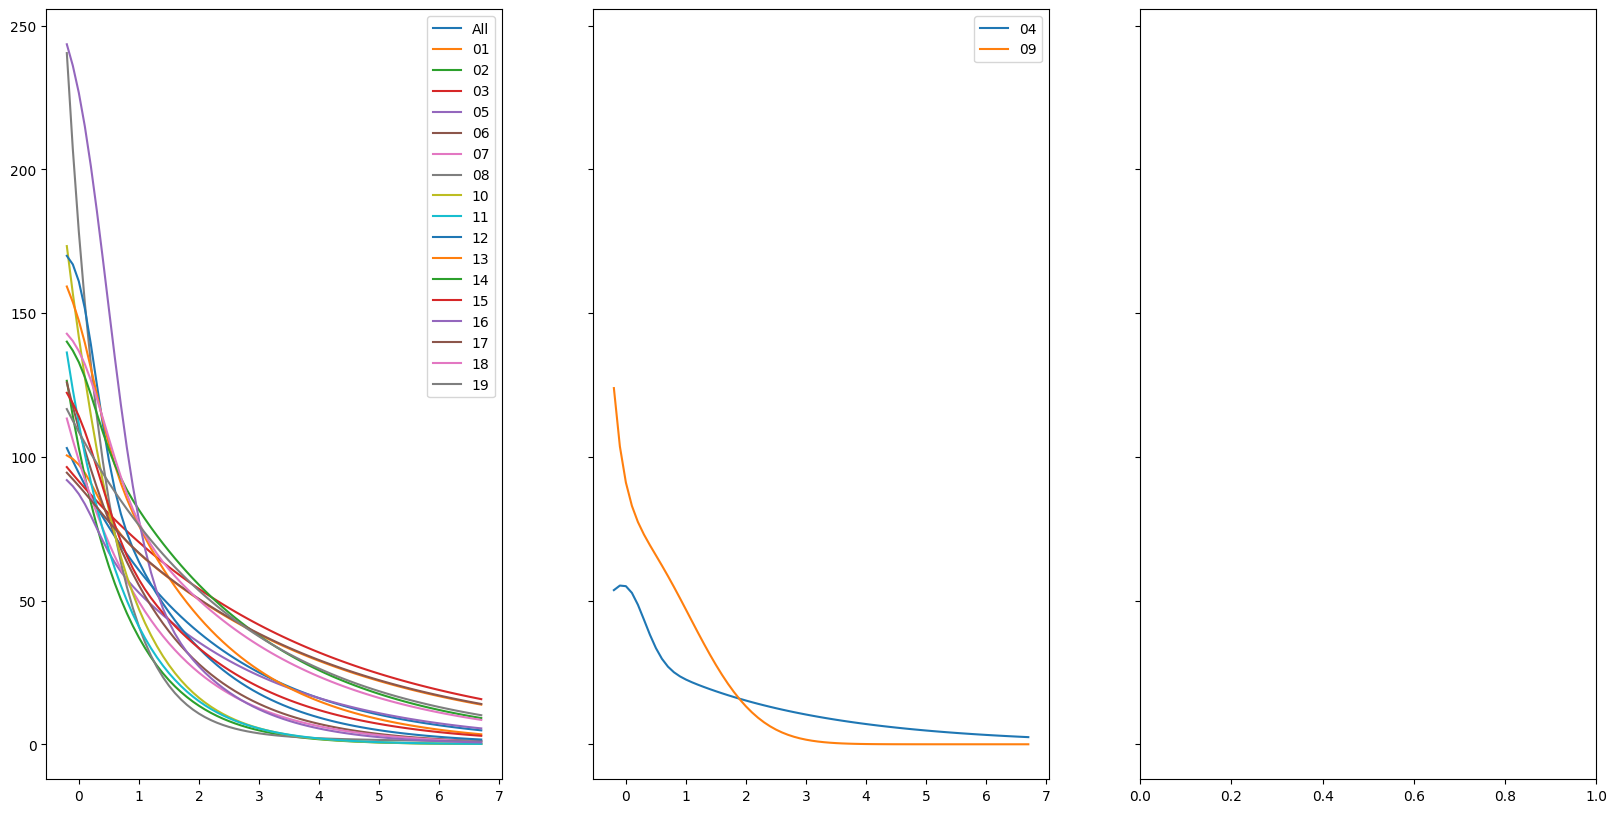

In [39]:
fig,axs = plt.subplots(1,3,figsize=(20,10), sharey=True)
for k in [0,1]:
    pd_sel = pd_exp_decay_fits_adv_5000.loc[pd_exp_decay_fits_adv_5000.kmeans_cluster_2 == k]
    ax = axs[k]
    for reg in pd_sel.rgi_reg:
        pd_sel_reg = pd_sel.loc[pd_sel.rgi_reg==reg]
        a,b,c,d = pd_sel_reg[['a_comp', 'b_comp', 'c_comp', 'd_comp']].values.squeeze()
        ax.plot(glob_temp, exponential_decay(glob_temp,a,b,c,d), label=reg)
        ax.legend()

**simple fit**

In [118]:
pd_exp_decay_fits_simple_5000 = pd_exp_decay_fits_simple.loc[pd_exp_decay_fits_simple.year ==5000]
regions = pd_exp_decay_fits_simple_5000.rgi_reg.values
data = pd_exp_decay_fits_simple_5000[['a_simple', 'b_simple']].values

# Perform K-means clustering
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Get the resulting centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Print the resulting centroids and labels
print("Centroids:")
print(centroids)
print("Labels:")
print(labels)

pd_exp_decay_fits_simple_5000[f'kmeans_cluster_{k}'] = labels

Centroids:
[[158.79073418   0.8316755 ]
 [ 95.88115773   0.58440276]]
Labels:
[1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1]


/tmp/ipykernel_76094/3685608285.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_exp_decay_fits_simple_5000[f'kmeans_cluster_{k}'] = labels


In [119]:
def exponential_decay(x, a, b):
    exp_values_b = -b * x
    return a * np.exp(exp_values_b) #+ c * np.exp(exp_values_d)#**c 

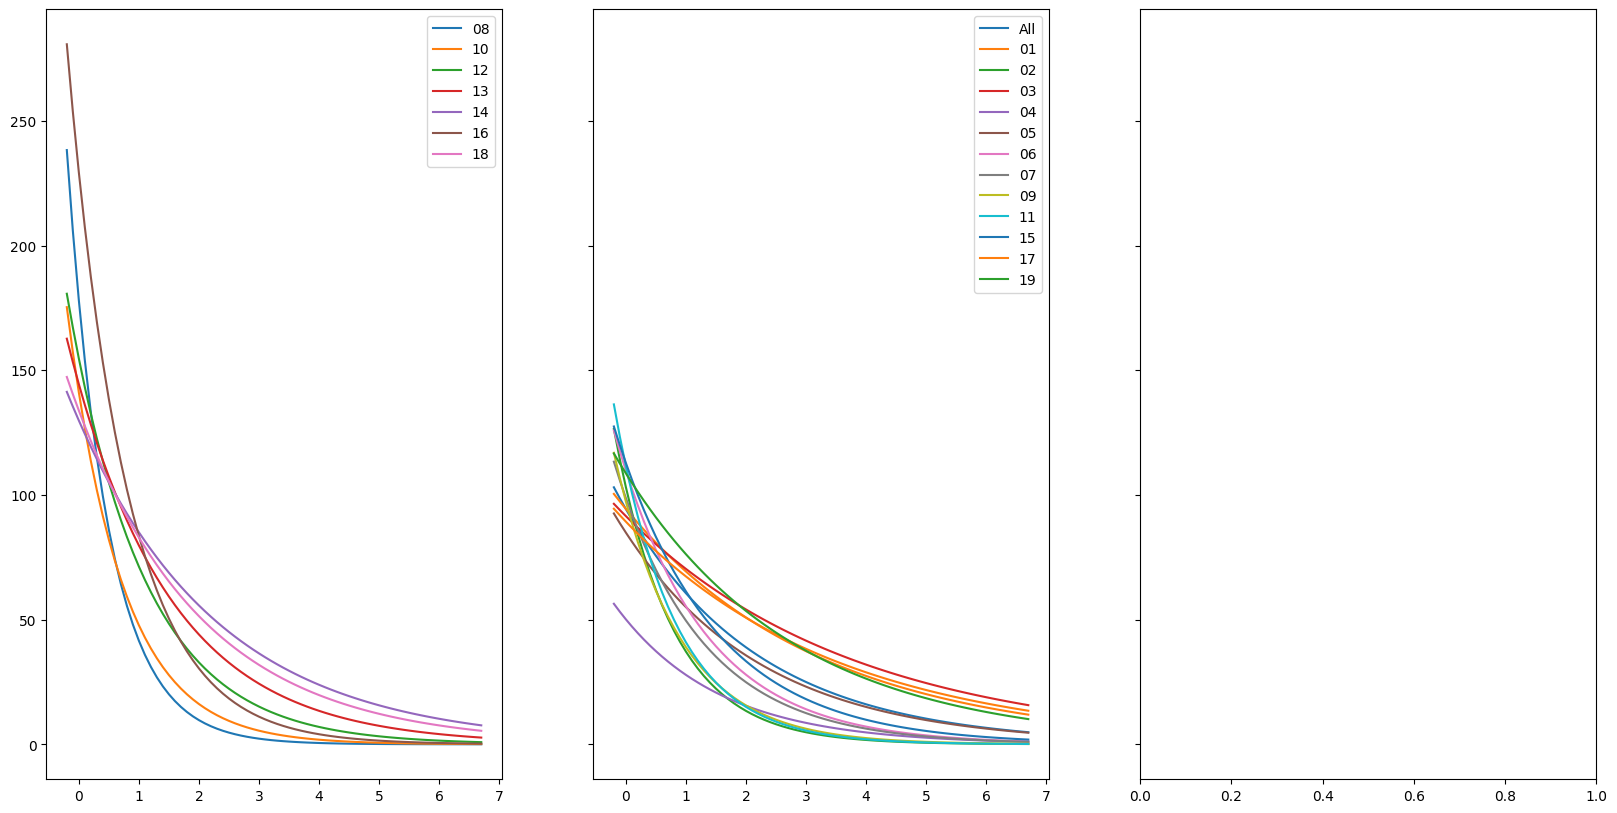

In [120]:
fig,axs = plt.subplots(1,3,figsize=(20,10), sharey=True)
for k in [0,1]:
    pd_sel = pd_exp_decay_fits_simple_5000.loc[pd_exp_decay_fits_simple_5000.kmeans_cluster_2 == k]
    ax = axs[k]
    for reg in pd_sel.rgi_reg:
        pd_sel_reg = pd_sel.loc[pd_sel.rgi_reg==reg]
        a,b = pd_sel_reg[['a_simple', 'b_simple']].values.squeeze()
        ax.plot(glob_temp, exponential_decay(glob_temp,a,b), label=reg)
        ax.legend()

<AxesSubplot:xlabel='b_simple', ylabel='a_simple'>

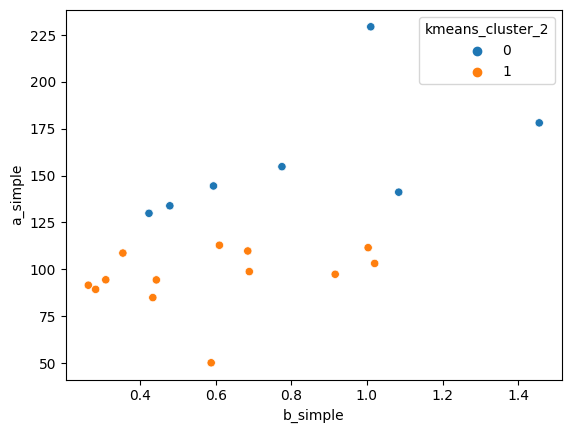

In [122]:
sns.scatterplot(data=pd_exp_decay_fits_simple_5000, x='b_simple', y='a_simple', hue='kmeans_cluster_2')

### use the different time slots ...

In [67]:
pd_exp_decay_fits_simple = pd.read_csv('fitted_glacier_response_to_global_temp_ch_simple.csv', index_col=0)

array(['All', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19'], dtype=object)

In [93]:
year_l = pd_exp_decay_fits_simple.year.unique()
col_l = []
for k in np.arange(0,4):
    col_l.append(f'a_simple_{year_l[k]}')
    col_l.append(f'b_simple_{year_l[k]}')
pd_exp_decay_fits_simple_all = pd.DataFrame(index=pd_exp_decay_fits_simple.rgi_reg.unique(), columns =col_l, data=pd_exp_decay_fits_simple[['a_simple', 'b_simple']].values.reshape(20,8))

In [94]:
pd_exp_decay_fits_simple_all

,a_simple_50,b_simple_50,a_simple_100,b_simple_100,a_simple_500,b_simple_500,a_simple_5000,b_simple_5000
All,103.363877,0.131692,100.865068,0.186778,101.857740,0.638656,103.169744,0.071614
01,99.787629,0.165685,100.921458,0.135449,107.102846,0.224139,106.648187,0.230862
02,124.913497,0.497745,107.000364,0.205159,108.991740,0.630672,106.493193,0.741248
03,138.867361,0.661234,114.635834,0.310045,112.140662,0.211116,107.457947,0.458192
04,171.192168,0.854356,97.713026,0.197416,125.446456,0.422199,103.854910,0.074085
05,102.522175,0.199771,98.060018,0.264158,101.716771,0.874788,103.319102,0.119106
06,93.232239,0.282503,98.319217,0.208126,108.182562,0.348481,104.240985,0.339992
07,139.073484,0.797138,105.926756,0.325712,114.574107,0.834900,106.529023,0.878245
08,148.522406,0.739513,121.909546,0.425014,117.216232,0.301483,108.424181,0.558400
09,196.206925,0.931453,94.298632,0.258077,128.562302,0.453461,104.309516,0.121903


In [96]:
regions = pd_exp_decay_fits_simple_all.index.values
data = pd_exp_decay_fits_simple_all.values

# Perform K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Get the resulting centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Print the resulting centroids and labels
print("Centroids:")
print(centroids)
print("Labels:")
print(labels)

pd_exp_decay_fits_simple_all[f'kmeans_cluster_{k}'] = labels

Centroids:
[[195.39741856   1.10690939  94.43684837   0.44212073 133.02044306
    0.66208525 107.40117944   0.46984368]
 [ 87.7633385    0.34292907  94.85765023   0.27577887 105.53749874
    0.67513862 100.40228859   0.31887732]
 [143.4961843    0.70767473 122.13953524   0.40545155 118.16287226
    0.46986465 108.87006355   0.64133714]]
Labels:
[1 1 2 2 0 1 1 2 2 0 1 1 0 2 0 1 1 0 2 0]


In [97]:
def exponential_decay(x, a, b):
    exp_values_b = -b * x
    return a * np.exp(exp_values_b) #+ c * np.exp(exp_values_d)#**c 

In [103]:
pd_exp_decay_fits_simple_all = pd_exp_decay_fits_simple_all.reset_index()

In [104]:
pd_exp_decay_fits_simple_all

,index,a_simple_50,b_simple_50,a_simple_100,b_simple_100,a_simple_500,b_simple_500,a_simple_5000,b_simple_5000,kmeans_cluster_3
0,All,103.363877,0.131692,100.865068,0.186778,101.857740,0.638656,103.169744,0.071614,1
1,01,99.787629,0.165685,100.921458,0.135449,107.102846,0.224139,106.648187,0.230862,1
2,02,124.913497,0.497745,107.000364,0.205159,108.991740,0.630672,106.493193,0.741248,2
3,03,138.867361,0.661234,114.635834,0.310045,112.140662,0.211116,107.457947,0.458192,2
4,04,171.192168,0.854356,97.713026,0.197416,125.446456,0.422199,103.854910,0.074085,0
5,05,102.522175,0.199771,98.060018,0.264158,101.716771,0.874788,103.319102,0.119106,1
6,06,93.232239,0.282503,98.319217,0.208126,108.182562,0.348481,104.240985,0.339992,1
7,07,139.073484,0.797138,105.926756,0.325712,114.574107,0.834900,106.529023,0.878245,2
8,08,148.522406,0.739513,121.909546,0.425014,117.216232,0.301483,108.424181,0.558400,2
9,09,196.206925,0.931453,94.298632,0.258077,128.562302,0.453461,104.309516,0.121903,0


<AxesSubplot:xlabel='index', ylabel='b_simple_5000'>

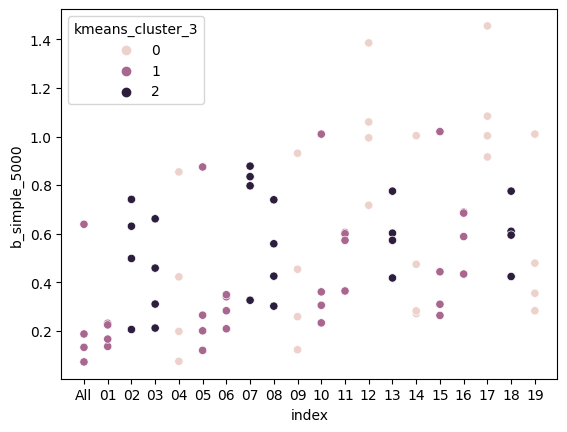

In [113]:
sns.scatterplot(data=pd_exp_decay_fits_simple_all, x='index', y='b_simple_5000', hue='kmeans_cluster_3')
sns.scatterplot(data=pd_exp_decay_fits_simple_all, x='index', y='b_simple_500', hue='kmeans_cluster_3', legend=False)
sns.scatterplot(data=pd_exp_decay_fits_simple_all, x='index', y='b_simple_100', hue='kmeans_cluster_3', legend=False)
sns.scatterplot(data=pd_exp_decay_fits_simple_all, x='index', y='b_simple_50', hue='kmeans_cluster_3', legend=False)

In [115]:
pd_exp_decay_fits_simple

,rgi_reg,year,a_simple,b_simple
0,All,50,103.363877,0.131692
1,01,50,100.865068,0.186778
2,02,50,101.857740,0.638656
3,03,50,103.169744,0.071614
4,04,50,99.787629,0.165685
...,...,...,...,...
75,15,5000,112.823848,0.609827
76,16,5000,229.377767,1.010184
77,17,5000,89.281170,0.282378
78,18,5000,133.864869,0.478691


ValueError: Could not interpret value `kmeans_cluster_3` for parameter `hue`

<AxesSubplot:xlabel='index', ylabel='a_simple_5000'>

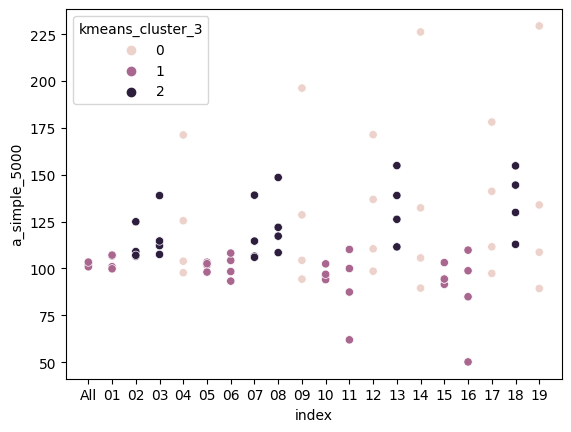

In [114]:
sns.scatterplot(data=pd_exp_decay_fits_simple_all, x='index', y='a_simple_5000', hue='kmeans_cluster_3')
sns.scatterplot(data=pd_exp_decay_fits_simple_all, x='index', y='a_simple_500', hue='kmeans_cluster_3', legend=False)
sns.scatterplot(data=pd_exp_decay_fits_simple_all, x='index', y='a_simple_100', hue='kmeans_cluster_3', legend=False)
sns.scatterplot(data=pd_exp_decay_fits_simple_all, x='index', y='a_simple_50', hue='kmeans_cluster_3', legend=False)

<AxesSubplot:xlabel='index', ylabel='a_simple_5000'>

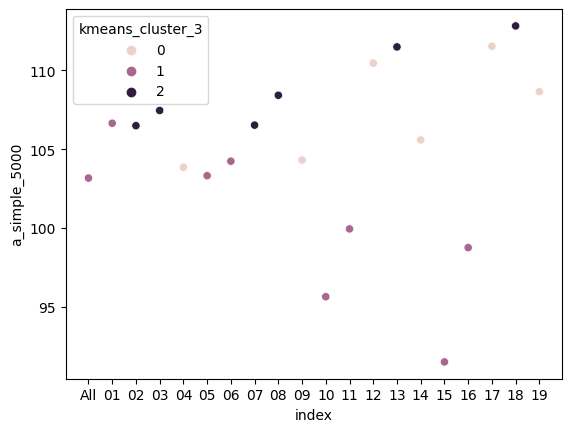

In [109]:
sns.scatterplot(data=pd_exp_decay_fits_simple_all, x='index', y='a_simple_5000', hue='kmeans_cluster_3')

KeyError: "None of [Index(['a_simple', 'b_simple'], dtype='object')] are in the [columns]"

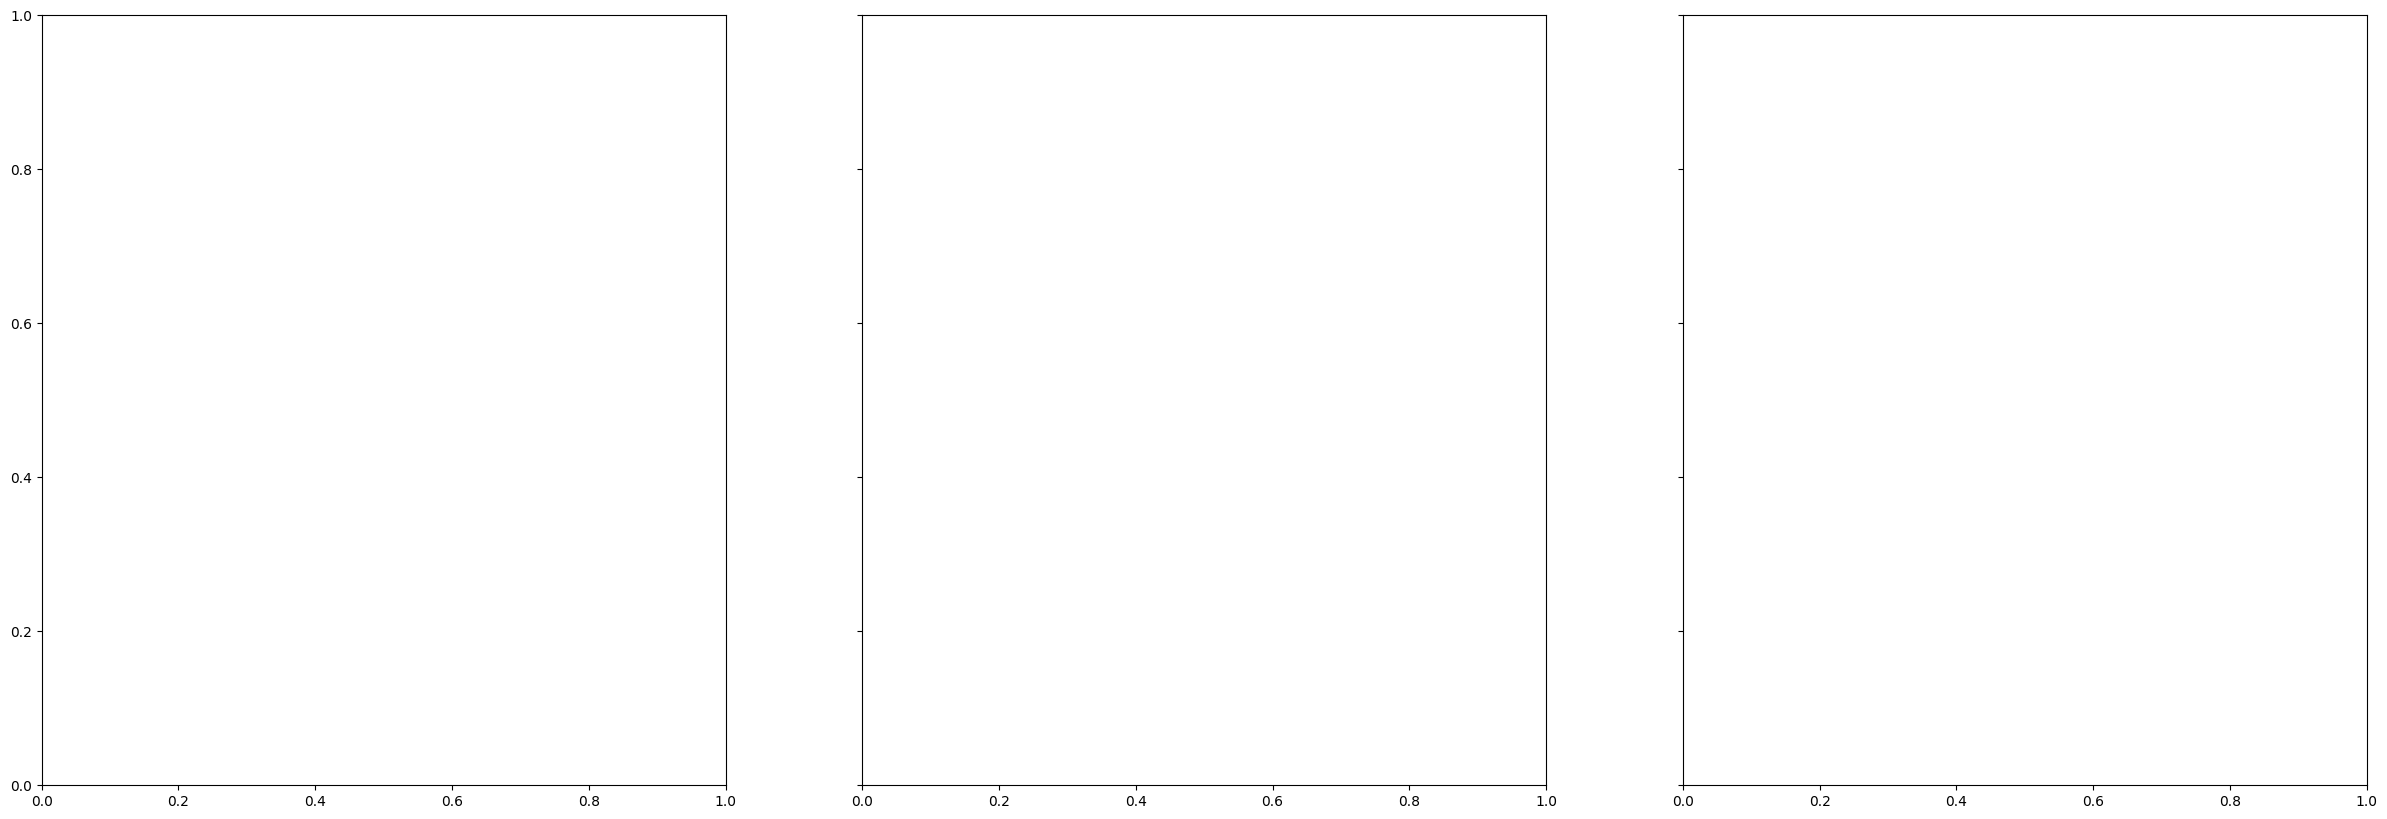

In [100]:
fig,axs = plt.subplots(1,3,figsize=(30,10), sharey=True)
for k in [0,1,2]:
    pd_sel = pd_exp_decay_fits_simple_all.loc[pd_exp_decay_fits_simple_all.kmeans_cluster_3 == k]
    ax = axs[k]
    for reg in pd_sel.index:
        pd_sel_reg = pd_sel.loc[pd_sel.index==reg]
        a,b = pd_sel_reg[['a_simple', 'b_simple']].values.squeeze()
        ax.plot(glob_temp, exponential_decay(glob_temp,a,b), label=reg)
        ax.legend()